# 数据格式

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import pandas as pd
import librosa.display
from tqdm import trange

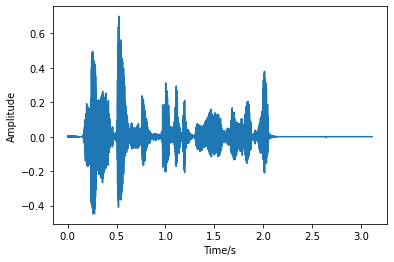

In [ ]:
fs = 16000
sig, _ = librosa.load("data/train/1.wav", sr=fs)
time = np.arange(0, len(sig)) * (1.0/fs)
plt.plot(time, sig, color="C0")
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
sig.shape

(49858,)

# 音频时长

In [24]:
times = []
for i in trange(1, 2001):
    y_ps, sr = librosa.load(f"data/train/{i}.wav")
    time = librosa.get_duration(y_ps, sr)
    times.append(time)

100%|██████████| 2000/2000 [02:26<00:00, 13.61it/s]


In [ ]:
print(f"max: {max(times)}s")
print(f"min: {min(times)}s")

max: 11.34453514739229s
min: 2.000136054421769s


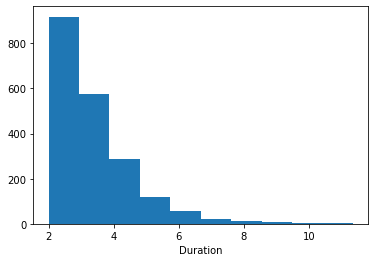

In [ ]:
plt.hist(times)
plt.xlabel("Duration")
plt.show()

# 计算基频

In [ ]:
import scipy.io.wavfile as wav
import numpy as np
import pysptk

In [ ]:
fs, data_audio = wav.read('data/train/1.wav')
size_step = 0.02

In [ ]:
data_audiof = data_audio.astype(np.float64)
size_stepS = size_step * fs
bf = pysptk.sptk.swipe(data_audiof, fs, int(size_stepS), min=50, max=500, otype='f0')
print(bf[bf>0].mean())

220.63711464482458


# 计算所有人的平均基频

In [ ]:
df = pd.read_excel('data/train.xlsx')
lb = list(df['label'])
l = []
for i in trange(1, 2001):
    fs, data_audio = wav.read(f"data/train/{i}.wav")
    size_step = 0.02
    data_audiof = data_audio.astype(np.float64)
    size_stepS = size_step * fs
    bf = pysptk.sptk.swipe(data_audiof, fs, int(size_stepS), min=50, max=500, otype='f0')
    q = bf[bf>0]
    if q.shape[0] > 0:
        l.append([f"{i}.wav",lb[i-1],q.mean()])
    else:
        l.append([f"{i}.wav",lb[i-1],0])

100%|██████████| 2000/2000 [02:31<00:00, 13.24it/s]


In [ ]:
res = pd.DataFrame(l, columns=['filename', 'label', 'bf'])
res.to_excel('data/train_preprocessed.xlsx', index=None)

In [ ]:
df = pd.read_excel('data/test.xlsx')
lb = list(df['label'])
l = []
for i in trange(2001, 2501):
    fs, data_audio = wav.read(f"data/test/{i}.wav")
    size_step = 0.02
    data_audiof = data_audio.astype(np.float64)
    size_stepS = size_step * fs
    bf = pysptk.sptk.swipe(data_audiof, fs, int(size_stepS), min=50, max=500, otype='f0')
    q = bf[bf>0]
    if q.shape[0] > 0:
        l.append([f"{i}.wav",lb[i-2000-1],q.mean()])
    else:
        l.append([f"{i}.wav",lb[i-2000-1],0])

100%|██████████| 500/500 [00:38<00:00, 12.85it/s]


In [ ]:
res = pd.DataFrame(l, columns=['filename', 'label', 'bf'])
res.to_excel('data/test_preprocessed.xlsx', index=None)

In [ ]:
z = pd.read_excel('data/train_preprocessed.xlsx')
s = z['bf'].groupby(z['label'])
print(s.mean())

label
0    215.819949
1    143.669548
Name: bf, dtype: float64


<AxesSubplot:>

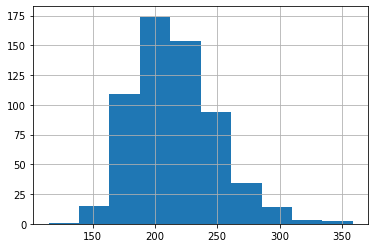

In [ ]:
z['bf'][z['label']==0].hist()

<AxesSubplot:>

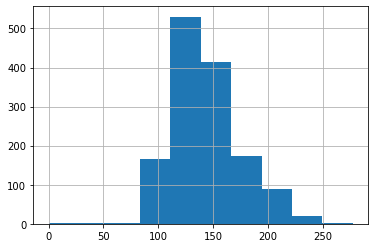

In [ ]:
z['bf'][z['label']==1].hist()

# 梅尔频谱

In [ ]:
def wav2melspectrogram(path):
    y, sr = librosa.load(path)
    melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
    spec = librosa.power_to_db(melspec)
    # spec = (spec+80) / 80
    return spec

In [ ]:
# 女生的梅尔频谱
spec = wav2melspectrogram("data/train/1.wav")

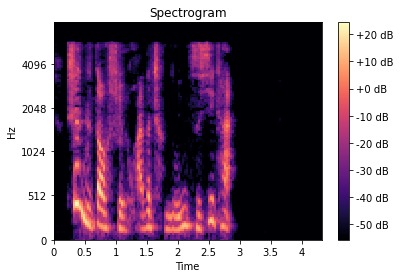

In [ ]:
librosa.display.specshow(spec, y_axis='mel', sr=fs, fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
# 男生的梅尔频谱
spec = wav2melspectrogram("data/train/4.wav")

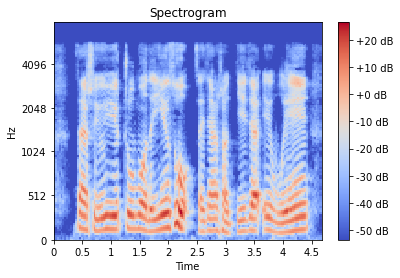

In [ ]:
librosa.display.specshow(spec, y_axis='mel', sr=fs, fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# 梅尔倒谱系数

In [25]:
# 女生的梅尔倒谱系数
y_ps, sr = librosa.load(f"data/train/1.wav", sr=None)
mfcc = np.mean(librosa.feature.mfcc(y=y_ps, sr=sr, n_mfcc=100, n_fft=1024, hop_length=512), axis=1)
print(f"max: {max(mfcc)}")
print(f"min: {min(mfcc)}")

max: 32.2575569152832
min: -466.370361328125


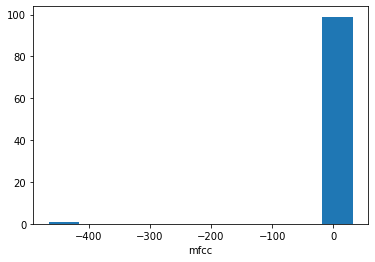

In [26]:
plt.hist(mfcc)
plt.xlabel("mfcc")
plt.show()

[Text(0.5, 1.0, 'MFCC')]

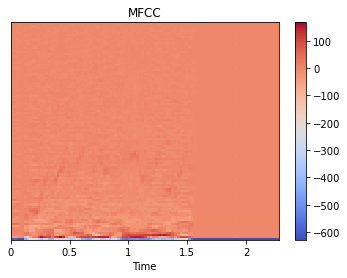

In [27]:
fig, ax = plt.subplots()
mfcc = librosa.feature.mfcc(y=y_ps, sr=sr, n_mfcc=100, n_fft=1024, hop_length=512)
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [28]:
# 男生的梅尔倒谱系数
y_ps, sr = librosa.load(f"data/train/4.wav", sr=None)
mfcc = np.mean(librosa.feature.mfcc(y=y_ps, sr=sr, n_mfcc=100, n_fft=1024, hop_length=512), axis=1)
print(f"max: {max(mfcc)}")
print(f"min: {min(mfcc)}")

max: 85.02069854736328
min: -343.28533935546875


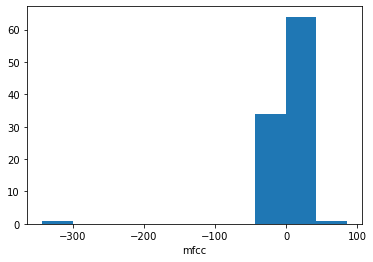

In [29]:
plt.hist(mfcc)
plt.xlabel("mfcc")
plt.show()

[Text(0.5, 1.0, 'MFCC')]

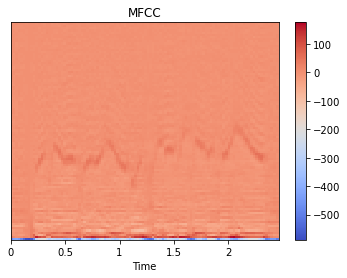

In [30]:
fig, ax = plt.subplots()
mfcc = librosa.feature.mfcc(y=y_ps, sr=sr, n_mfcc=100, n_fft=1024, hop_length=512)
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')